# Outlier Detection

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import influence_plot

In [6]:
x_values = [10, 15, 20, 13, 12, 11, 14, 12, 11, 102, 12, 14, 14, 19, 14, 19, 20, 22, 11, 11, 10]

102 is an outlier


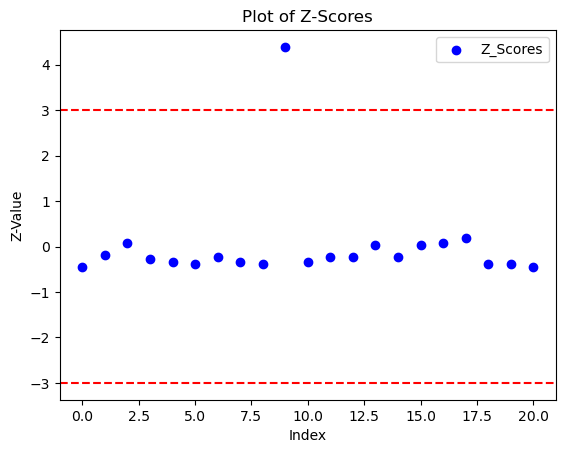

In [8]:
#Outlier Detection With Z-Scores
#Decision Rule: Z > 3 or Z < -3 = Outlier
mean = np.mean(x_values)
stdev = np.std(x_values)

z_scores = []

for i in x_values:
    z = (i - mean) / stdev
    z_scores.append(z)
    if abs(z) >=3:
        print(f'{i} is an outlier')
        
plt.scatter(np.arange(len(x_values)), z_scores, color='blue', label='Z_Scores')
plt.axhline(y=3, color='red', linestyle='--')
plt.axhline(y=-3, color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Z-Value')
plt.title('Plot of Z-Scores')
plt.legend()
plt.show()

102 is an outlier


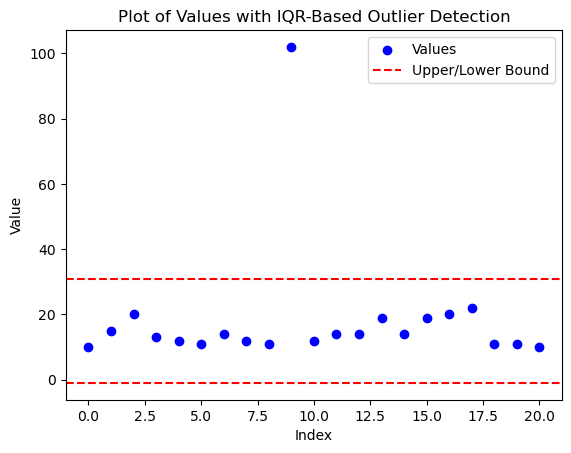

In [10]:
#Outlier Detection With IQR
#Decision Rule: < 1.5 x IQR below 1st quartile OR > 1.5 x IQR above 3rd quartile = Outlier
Q1, Q3 = np.percentile(x_values, [25, 75])

IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

for i in x_values:
    if i > upper_bound or i < lower_bound:
        print(f'{i} is an outlier')
        
plt.scatter(np.arange(len(x_values)), x_values, color='blue', label='Values')
plt.axhline(y=upper_bound, color='red', linestyle='--', label='Upper/Lower Bound')
plt.axhline(y=lower_bound, color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Values with IQR-Based Outlier Detection')
plt.legend()
plt.show()

In [12]:
import numpy as np

def detect_outliers_iqr(data, factor=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    outliers = (data < lower_bound) | (data > upper_bound)
    
    return outliers

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100])
outliers = detect_outliers_iqr(data)
print("Outliers:", data[outliers])

Outliers: [100]


In [20]:
#Regression Outlier Detection

np.random.seed(1663)  
X = np.random.normal(5, 2, 50)  
Y = 2.5 * X + np.random.normal(0, 2, 50)

#Adding outliers
X = np.append(X, [8, 8.5, 9])
y = np.append(Y, [20, 22, 19])

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

influence = OLSInfluence(results)
influence

In [22]:
diagnostics = pd.DataFrame({
    "Leverage": influence.hat_matrix_diag,
    "Studentized Residuals": influence.resid_studentized_external,
    "Cooks Distance": influence.cooks_distance[0],
    "DFBETAs": influence.dfbetas[:, 1]  # For the slope coefficient
})


diagnostics

,Leverage,Studentized Residuals,Cooks Distance,DFBETAs
0,0.024435,0.468785,0.002795,0.035413
1,0.051601,-1.564643,0.064760,-0.290677
2,0.020084,-0.420867,0.001845,0.014826
3,0.025812,-0.408171,0.002244,-0.034460
4,0.020095,0.378345,0.001493,-0.013388
5,0.024635,1.382602,0.023716,0.106311
6,0.021318,-0.548055,0.003317,-0.027422
7,0.018962,-0.493645,0.002391,0.004845
8,0.019630,0.327647,0.001094,0.009134
9,0.024318,1.159807,0.016651,0.086686


In [24]:
influential_outliers = diagnostics[(abs(diagnostics["Studentized Residuals"]) > 3) | 
                                   (diagnostics["Leverage"] > 2*(2+1)/len(X)) |
                                   (diagnostics["Cooks Distance"] > 4/(len(X)-2-1)) |
                                   (abs(diagnostics["DFBETAs"]) > 2/np.sqrt(len(X)))]


influential_outliers

,Leverage,Studentized Residuals,Cooks Distance,DFBETAs
1,0.051601,-1.564643,0.064760,-0.290677
20,0.052740,3.058558,0.223763,-0.578366
25,0.113798,-1.717534,0.182426,0.562135
40,0.113440,-0.762380,0.037493,0.249000
49,0.080048,-1.166291,0.058765,0.300768
52,0.078597,-1.835084,0.137257,-0.467225


    Leverage  Studentized Residuals  Cooks Distance   DFBETAs
20   0.05274               3.058558        0.223763 -0.578366


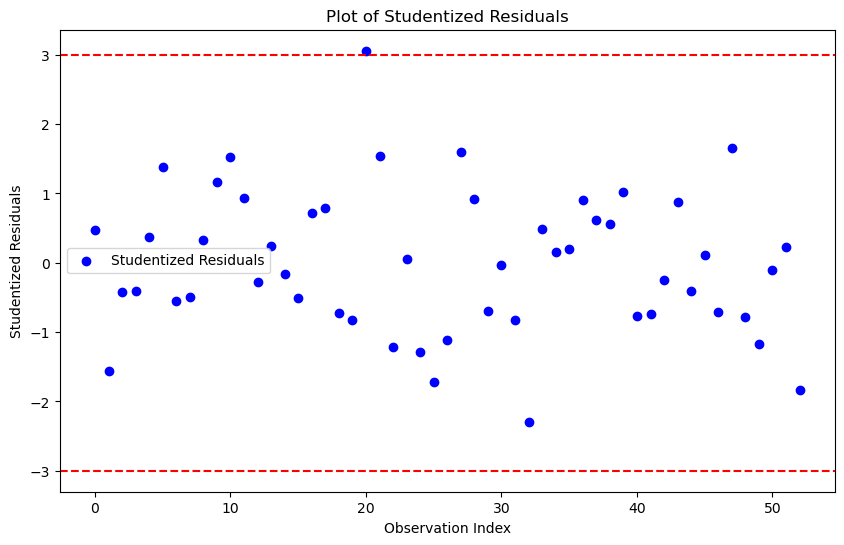

In [26]:
#Studentized Residuals 

print(diagnostics[abs(diagnostics["Studentized Residuals"]) > 3])

plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(influence.resid_studentized_external)), influence.resid_studentized_external, color='blue', label='Studentized Residuals')
plt.axhline(y=3, color='red', linestyle='--')
plt.axhline(y=-3, color='red', linestyle='--')
plt.xlabel('Observation Index')
plt.ylabel('Studentized Residuals')
plt.title('Plot of Studentized Residuals')
plt.legend()
plt.show()

In [28]:
#Leverage 2(p+1)/n or 3(p+1)/n, where p=number of predictors, excluding the constant
n = len(X)  
p = 1       
leverage_threshold_2 = 2 * (p + 1) / n
print(leverage_threshold_2)
leverage_threshold_3 = 3 * (p + 1) / n
print(leverage_threshold_3)

diagnostics[diagnostics["Leverage"] > leverage_threshold_2]
diagnostics[diagnostics["Leverage"] > leverage_threshold_3]

0.07547169811320754
0.11320754716981132


,Leverage,Studentized Residuals,Cooks Distance,DFBETAs
25,0.113798,-1.717534,0.182426,0.562135
40,0.113440,-0.762380,0.037493,0.249000


0.07547169811320754
    Leverage  Studentized Residuals  Cooks Distance   DFBETAs
20  0.052740               3.058558        0.223763 -0.578366
25  0.113798              -1.717534        0.182426  0.562135
32  0.031254              -2.298555        0.078623  0.259904
52  0.078597              -1.835084        0.137257 -0.467225


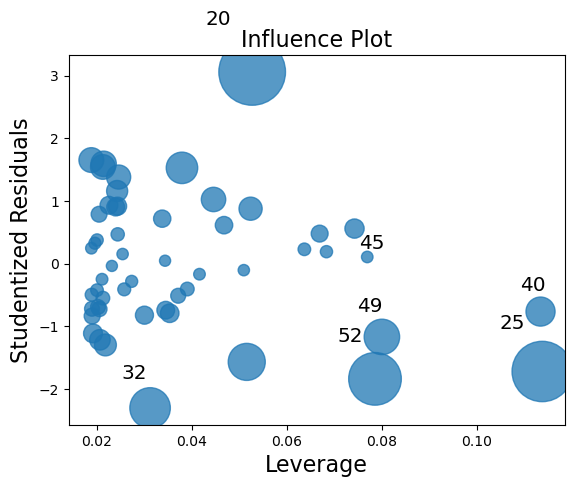

In [30]:
#High Leverage Outliers With Cook's Distance - > 4/n criteria
cutoff_1 = 4/len(X)
print(cutoff_1)
print(diagnostics[diagnostics["Cooks Distance"] > cutoff_1])

#High Leverage Outliers With Cook's Distance - > 1 criteria
diagnostics[diagnostics["Cooks Distance"] > 1]

#Influence Plot - Size is based on Cook's D
influence_plot(results)
plt.show()

In [32]:
#Outliers With DFBETA
diagnostics[(abs(diagnostics["DFBETAs"]) > 2/np.sqrt(len(X)))]

,Leverage,Studentized Residuals,Cooks Distance,DFBETAs
1,0.051601,-1.564643,0.064760,-0.290677
20,0.052740,3.058558,0.223763,-0.578366
25,0.113798,-1.717534,0.182426,0.562135
49,0.080048,-1.166291,0.058765,0.300768
52,0.078597,-1.835084,0.137257,-0.467225


In [ ]:
#Dropping Outliers
df1 = df1.drop(index=[1, 20, 25, 49, 52])  